# Gasto Federalizado

Dashboard generado en jupyter.

In [1]:
import pandas as pd
df = pd.read_csv('https://www.secciones.hacienda.gob.mx/work/models/estadisticas_oportunas/datos_abiertos_eopf/transferencias_entidades_fed.csv', sep=',', encoding = 'utf-8')
df.head()

CICLO      MES CLAVE_DE_CONCEPTO  \
0   2011    Enero          XACPSS00   
1   2011  Febrero          XACPSS00   
2   2011    Marzo          XACPSS00   
3   2011    Abril          XACPSS00   
4   2011     Mayo          XACPSS00   

                                            NOMBRE  \
0  Total: Recursos para Protecci?n Social en Salud   
1  Total: Recursos para Protecci?n Social en Salud   
2  Total: Recursos para Protecci?n Social en Salud   
3  Total: Recursos para Protecci?n Social en Salud   
4  Total: Recursos para Protecci?n Social en Salud   

                                                TEMA  \
0  Transferencias del Gobierno Federal a Entidade...   
1  Transferencias del Gobierno Federal a Entidade...   
2  Transferencias del Gobierno Federal a Entidade...   
3  Transferencias del Gobierno Federal a Entidade...   
4  Transferencias del Gobierno Federal a Entidade...   

                                    SUBTEMA                           SECTOR  \
0  Recursos para Protecci?n Social en Salud  Gobierno Federal Presupuestario   
1  Recursos para Protecci?n Social en Salud  Gobierno Federal Presupuestario   
2  Recursos para Protecci?n Social en Salud  Gobierno Federal Presupuestario   
3  Recursos para Protecci?n Social en Salud  Gobierno Federal Presupuestario   
4  Recursos para Protecci?n Social en Salud  Gobierno Federal Presupuestario   

    AMBITO TIPO_DE_INFORMACION BASE_DE_REGISTRO UNIDAD_DE_MEDIDA  \
0  Federal               Flujo           Pagado   Miles de Pesos   
1  Federal               Flujo           Pagado   Miles de Pesos   
2  Federal               Flujo           Pagado   Miles de Pesos   
3  Federal               Flujo           Pagado   Miles de Pesos   
4  Federal               Flujo           Pagado   Miles de Pesos   

  PERIODO_INICIO PERIODO_FINAL FRECUENCIA  \
0        2013-01       2014-12    Mensual   
1        2013-01       2014-12    Mensual   
2        2013-01       2014-12    Mensual   
3        2013-01       2014-12    Mensual   
4        2013-01       2014-12    Mensual   

                                           DIFUSION  MONTO  
0  30 d?as despu?s del cierre del mes de referencia    0.0  
1  30 d?as despu?s del cierre del mes de referencia    0.0  
2  30 d?as despu?s del cierre del mes de referencia    0.0  
3  30 d?as despu?s del cierre del mes de referencia    0.0  
4  30 d?as despu?s del cierre del mes de referencia    0.0

In [2]:
df.loc[df['MES'] == 'Enero', 'MesN'] = '01'
df.loc[df['MES'] == 'Febrero', 'MesN'] = '02'
df.loc[df['MES'] == 'Marzo', 'MesN'] = '03'
df.loc[df['MES'] == 'Abril', 'MesN'] = '04'
df.loc[df['MES'] == 'Mayo', 'MesN'] = '05'
df.loc[df['MES'] == 'Junio', 'MesN'] = '06'
df.loc[df['MES'] == 'Julio', 'MesN'] = '07'
df.loc[df['MES'] == 'Agosto', 'MesN'] = '08'
df.loc[df['MES'] == 'Septiembre', 'MesN'] = '09'
df.loc[df['MES'] == 'Octubre', 'MesN'] = '10'
df.loc[df['MES'] == 'Noviembre', 'MesN'] = '11'
df.loc[df['MES'] == 'Diciembre', 'MesN'] = '12'
df['date'] = df['CICLO'].astype(str)  + '-' + df['MesN'].astype(str) + '-01'
df['Fecha'] = df['date']
df = df.set_index('date')
df['Fecha'] = pd.to_datetime(df['Fecha'])
df.sort_values(by=['Fecha'])
df.dtypes

CICLO                           int64
MES                            object
CLAVE_DE_CONCEPTO              object
NOMBRE                         object
TEMA                           object
SUBTEMA                        object
SECTOR                         object
AMBITO                         object
TIPO_DE_INFORMACION            object
BASE_DE_REGISTRO               object
UNIDAD_DE_MEDIDA               object
PERIODO_INICIO                 object
PERIODO_FINAL                  object
FRECUENCIA                     object
DIFUSION                       object
MONTO                         float64
MesN                           object
Fecha                  datetime64[ns]
dtype: object

In [3]:
df[['ENTIDAD','CONCEPTO']] = df.NOMBRE.str.split(':',expand=True)
df.loc[df['SUBTEMA'] == 'Recursos para Protecci?n Social en Salud', 'SUBTEMA'] = 'Recursos para Protección Social en Salud'
df.loc[df['CONCEPTO'] == ' 0.136% de la Recaudaci?n Federal Participable', 'CONCEPTO'] = '0.136% de la RFP'
df.loc[df['CONCEPTO'] == ' Aportaciones Federales para Entidades Federativas y Municipios (Incluye Ramos 33 y 25)', 'CONCEPTO'] = 'Aportaciones Federales para Entidades Federativas y Municipios (Incluye Ramos 33 y 25)'
df.loc[df['CONCEPTO'] == ' Convenios de Descentralizaci?n', 'CONCEPTO'] = 'Convenios de Descentralizacion'
df.loc[df['CONCEPTO'] == ' Convenios de Descentralizaci?n  a trav?s de la Comisi?n Nacional del Agua (CNA)', 'CONCEPTO'] = 'Convenios de Descentralización CNA'
df.loc[df['CONCEPTO'] == ' Convenios de Descentralizaci?n a trav?s de la Secretar?a de Agricultura Ganader?a Desarrollo Rural Pesca y Alimentaci?n (Sagarpa)', 'CONCEPTO'] = 'Convenios de Descentralización Sagarpa'
df.loc[df['CONCEPTO'] == ' Convenios de Descentralizaci?n a trav?s de la Secretar?a de Educaci?n P?blica (SEP)', 'CONCEPTO'] = 'Convenios de Descentralización SEP'
df.loc[df['CONCEPTO'] == ' Convenios de Reasignaci?n', 'CONCEPTO'] = 'Convenios de Reasignación'
df.loc[df['CONCEPTO'] == ' Fideicomiso para la Infraestructura en los Estados (FIES)', 'CONCEPTO'] = 'FIES'
df.loc[df['CONCEPTO'] == ' Fondo General de Participaciones', 'CONCEPTO'] = 'Fondo General'
df.loc[df['CONCEPTO'] == ' Fondo ISR', 'CONCEPTO'] = 'Fondo ISR'
df.loc[df['CONCEPTO'] == ' Fondo de Aportaciones M?ltiples (FAM)', 'CONCEPTO'] = 'Fondo de Aportaciones M?ltiples (FAM)'
df.loc[df['CONCEPTO'] == ' Fondo de Aportaciones M?ltiples (FAM) Asistencia Social', 'CONCEPTO'] = 'FAM Asistencia Social'
df.loc[df['CONCEPTO'] == ' Fondo de Aportaciones M?ltiples (FAM) Educaci?n B?sica', 'CONCEPTO'] = 'FAM Educación Básica'
df.loc[df['CONCEPTO'] == ' Fondo de Aportaciones M?ltiples (FAM) Educaci?n Superior', 'CONCEPTO'] = 'FAM Educación Superior'
df.loc[df['CONCEPTO'] == ' Fondo de Aportaciones para Educaci?n B?sica y Normal (FAEB)', 'CONCEPTO'] = 'FONE (antes FAEB)'
df.loc[df['CONCEPTO'] == ' Fondo de Aportaciones para el Fortalecimiento de las Entidades Federativas (FAFEF)', 'CONCEPTO'] = 'FAFEF'
df.loc[df['CONCEPTO'] == ' Fondo de Aportaciones para el Fortalecimiento de los Municipios y del Distrito Federal (FAFM)', 'CONCEPTO'] = 'FORTAMUN'
df.loc[df['CONCEPTO'] == ' Fondo de Aportaciones para la Educaci?n Tecnol?gica y de Adultos. (FAETA)', 'CONCEPTO'] = 'Fondo de Aportaciones para la Educaci?n Tecnol?gica y de Adultos. (FAETA)'
df.loc[df['CONCEPTO'] == ' Fondo de Aportaciones para la Educaci?n Tecnol?gica y de Adultos. (FAETA) Conalep', 'CONCEPTO'] = 'FAETA Conalep'
df.loc[df['CONCEPTO'] == ' Fondo de Aportaciones para la Educaci?n Tecnol?gica y de Adultos. (FAETA) INEA', 'CONCEPTO'] = 'FAETA INEA'
df.loc[df['CONCEPTO'] == ' Fondo de Aportaciones para la Infraestructura Social (FAIS Estatal)', 'CONCEPTO'] = 'FAIS Estatal'
df.loc[df['CONCEPTO'] == ' Fondo de Aportaciones para la Infraestructura Social (FAIS Municipal)', 'CONCEPTO'] = 'FAIS Municipal'
df.loc[df['CONCEPTO'] == ' Fondo de Aportaciones para la Infraestructura Social (FAIS)', 'CONCEPTO'] = 'Fondo de Aportaciones para la Infraestructura Social (FAIS)'
df.loc[df['CONCEPTO'] == ' Fondo de Aportaciones para la Seguridad P?blica de los Estados y del Distrito Federal (FASP)', 'CONCEPTO'] = 'FASP'
df.loc[df['CONCEPTO'] == ' Fondo de Aportaciones para los Servicios de Salud (FASSA)', 'CONCEPTO'] = 'FASSA'
df.loc[df['CONCEPTO'] == ' Fondo de Compensaci?n de Repecos Intermedios', 'CONCEPTO'] = 'FOCORI'
df.loc[df['CONCEPTO'] == ' Fondo de Estabilizaci?n de los Ingresos de las Entidades Federativas (FEIEF)', 'CONCEPTO'] = 'FEIEF'
df.loc[df['CONCEPTO'] == ' Fondo de Extracci?n de Hidrocarburos', 'CONCEPTO'] = 'FEXHI'
df.loc[df['CONCEPTO'] == ' Fondo de Fiscalizaci?n a Entidades Federativas', 'CONCEPTO'] = 'FOFIR'
df.loc[df['CONCEPTO'] == ' Fondo de Fomento Municipal', 'CONCEPTO'] = 'FOMUN'
df.loc[df['CONCEPTO'] == ' Gasto Federalizado del Ramo Provisiones Salariales y Economicas y Otros Subsidios', 'CONCEPTO'] = 'Gasto Federalizado del Ramo Provisiones Salariales y Economicas y Otros Subsidios'
df.loc[df['CONCEPTO'] == ' Incentivos Econ?micos', 'CONCEPTO'] = 'Incentivos Económicos'
df.loc[df['CONCEPTO'] == ' Participaciones a Entidades Federativas y Municipios (R28)', 'CONCEPTO'] = 'Participaciones a Entidades Federativas y Municipios (R28)'
df.loc[df['CONCEPTO'] == ' Participaciones a Entidades Federativas y Municipios (R28)}', 'CONCEPTO'] = 'Participaciones a Entidades Federativas y Municipios (R28)'
df.loc[df['CONCEPTO'] == ' Participaciones por el Derecho Adicional sobre la Extracci?n de Petr?leo', 'CONCEPTO'] = 'Derecho Adicional sobre la Extracción de Petróleo'
df.loc[df['CONCEPTO'] == ' Participaciones por el Impuesto Especial sobre Producci?n y Servicios (IEPS)', 'CONCEPTO'] = 'IEPS cervezas, tabacos y bebidas'
df.loc[df['CONCEPTO'] == ' Participaciones por el Impuesto Especial sobre Producci?n y Servicios de Gasolinas y Diesel (IEPS Gasolinas) Art?culo 2?.-A Fracci?n II Ley del IEPS', 'CONCEPTO'] = 'IEPS Gasolinas y Diesel'
df.loc[df['CONCEPTO'] == ' Participaciones por el Impuesto sobre Autom?viles Nuevos (ISAN)', 'CONCEPTO'] = 'ISAN'
df.loc[df['CONCEPTO'] == ' Participaciones por el Impuesto sobre Tenencia y Uso de Autom?viles', 'CONCEPTO'] = 'ISTUV'
df.loc[df['CONCEPTO'] == ' Recursos para Protecci?n Social en Salud', 'CONCEPTO'] = 'Recursos para Proteccion Social en Salud'
df.loc[df['CONCEPTO'] == ' Resto del Gasto Federalizado del Ramo Provisiones Salariales y Economicas y Otros Subsidios', 'CONCEPTO'] = 'Resto de Subsidios'
df.loc[df['SUBTEMA'] == 'Participaciones', 'SUBTEMA'] = 'Participaciones R28'
df.loc[df['SUBTEMA'] == 'Aportaciones Federales', 'SUBTEMA'] = 'Aportaciones R33'

In [4]:
df.loc[df['ENTIDAD'] == 'Coahuila de Zaragoza', 'ENTIDAD'] = 'Coahuila'
df.loc[df['ENTIDAD'] == 'Quer?taro', 'ENTIDAD'] = 'Queretaro'
df.loc[df['ENTIDAD'] == 'Nuevo Le?n', 'ENTIDAD'] = 'Nuevo Leon'
df.loc[df['ENTIDAD'] == 'Yucat?n', 'ENTIDAD'] = 'Yucatan'
df.loc[df['ENTIDAD'] == 'San Luis Potos?', 'ENTIDAD'] = 'San Luis Potosi'
df.loc[df['ENTIDAD'] == 'Michoac?n', 'ENTIDAD'] = 'Michoacan'
df.loc[df['ENTIDAD'] == 'M?xico', 'ENTIDAD'] = 'Mexico'
df['MONTOOK'] = df['MONTO']
df.loc[df['CONCEPTO'] == 'Aportaciones Federales para Entidades Federativas y Municipios (Incluye Ramos 33 y 25)', 'MONTOOK'] = 0
df.loc[df['CONCEPTO'] == 'Gasto Federalizado del Ramo Provisiones Salariales y Economicas y Otros Subsidios', 'MONTOOK'] = 0
df.loc[df['CONCEPTO'] == 'Convenios de Descentralizacion', 'MONTOOK'] = 0
df.loc[df['CONCEPTO'] == 'Fondo de Aportaciones M?ltiples (FAM)', 'MONTOOK'] = 0
df.loc[df['CONCEPTO'] == 'Fondo de Aportaciones para la Educaci?n Tecnol?gica y de Adultos. (FAETA)', 'MONTOOK'] = 0
df.loc[df['CONCEPTO'] == 'Fondo de Aportaciones para la Infraestructura Social (FAIS)', 'MONTOOK'] = 0
df.loc[df['CONCEPTO'] == 'Participaciones a Entidades Federativas y Municipios (R28)', 'MONTOOK'] = 0
df.loc[df['ENTIDAD'] == 'Total', 'MONTOOK'] = 0
#df.head()

In [5]:
#df2.drop(df2[df2.ENTIDAD == 'Total'].index, inplace = True)
#df2 = df.loc[df["ENTIDAD"] <> 'Total' ]
#df2.drop(df2[df2.MONTOOK == 0].index, inplace = True)
df2 = df[df["MONTOOK"] > 0 ]
df2.head()

CICLO        MES CLAVE_DE_CONCEPTO  \
date                                             
2011-02-01   2011    Febrero          XAC23B33   
2011-05-01   2011       Mayo          XAC23B33   
2011-08-01   2011     Agosto          XAC23B33   
2011-11-01   2011  Noviembre          XAC23B33   
2011-04-01   2011      Abril          XAC23C01   

                                                       NOMBRE  \
date                                                            
2011-02-01  No distribuible: Fondo de Estabilizaci?n de lo...   
2011-05-01  No distribuible: Fondo de Estabilizaci?n de lo...   
2011-08-01  No distribuible: Fondo de Estabilizaci?n de lo...   
2011-11-01  No distribuible: Fondo de Estabilizaci?n de lo...   
2011-04-01  Aguascalientes: Resto del Gasto Federalizado d...   

                                                         TEMA    SUBTEMA  \
date                                                                       
2011-02-01  Transferencias del Gobierno Federal a Entidade...  Subsidios   
2011-05-01  Transferencias del Gobierno Federal a Entidade...  Subsidios   
2011-08-01  Transferencias del Gobierno Federal a Entidade...  Subsidios   
2011-11-01  Transferencias del Gobierno Federal a Entidade...  Subsidios   
2011-04-01  Transferencias del Gobierno Federal a Entidade...  Subsidios   

                                     SECTOR   AMBITO TIPO_DE_INFORMACION  \
date                                                                       
2011-02-01  Gobierno Federal Presupuestario  Federal               Flujo   
2011-05-01  Gobierno Federal Presupuestario  Federal               Flujo   
2011-08-01  Gobierno Federal Presupuestario  Federal               Flujo   
2011-11-01  Gobierno Federal Presupuestario  Federal               Flujo   
2011-04-01  Gobierno Federal Presupuestario  Federal               Flujo   

           BASE_DE_REGISTRO  ... PERIODO_INICIO PERIODO_FINAL FRECUENCIA  \
date                         ...                                           
2011-02-01           Pagado  ...        2006-01       2014-12    Mensual   
2011-05-01           Pagado  ...        2006-01       2014-12    Mensual   
2011-08-01           Pagado  ...        2006-01       2014-12    Mensual   
2011-11-01           Pagado  ...        2006-01       2014-12    Mensual   
2011-04-01           Pagado  ...        2004-01       2014-12    Mensual   

                                                    DIFUSION         MONTO  \
date                                                                         
2011-02-01  30 d?as despu?s del cierre del mes de referencia  4.249213e+06   
2011-05-01  30 d?as despu?s del cierre del mes de referencia  5.353520e+06   
2011-08-01  30 d?as despu?s del cierre del mes de referencia  7.710972e+06   
2011-11-01  30 d?as despu?s del cierre del mes de referencia  6.838217e+06   
2011-04-01  30 d?as despu?s del cierre del mes de referencia  4.231564e+04   

            MesN      Fecha          ENTIDAD            CONCEPTO       MONTOOK  
date                                                                            
2011-02-01    02 2011-02-01  No distribuible               FEIEF  4.249213e+06  
2011-05-01    05 2011-05-01  No distribuible               FEIEF  5.353520e+06  
2011-08-01    08 2011-08-01  No distribuible               FEIEF  7.710972e+06  
2011-11-01    11 2011-11-01  No distribuible               FEIEF  6.838217e+06  
2011-04-01    04 2011-04-01   Aguascalientes  Resto de Subsidios  4.231564e+04  

[5 rows x 21 columns]

In [6]:
entidades = list(df2.ENTIDAD.unique())
entidades

['No distribuible',
 'Aguascalientes',
 'Baja California',
 'Baja California Sur',
 'Campeche',
 'Coahuila',
 'Colima',
 'Chiapas',
 'Chihuahua',
 'Distrito Federal',
 'Durango',
 'Guanajuato',
 'Guerrero',
 'Hidalgo',
 'Jalisco',
 'Mexico',
 'Michoacan',
 'Puebla',
 'Queretaro',
 'Quintana Roo',
 'San Luis Potosi',
 'Sinaloa',
 'Sonora',
 'Tabasco',
 'Tamaulipas',
 'Tlaxcala',
 'Veracruz',
 'Yucatan',
 'Zacatecas',
 'Morelos',
 'Nayarit',
 'Nuevo Leon',
 'Oaxaca']

In [7]:
conceptos = list(df2.CONCEPTO.unique())
conceptos

['FEIEF',
 'Resto de Subsidios',
 'Convenios de Reasignación',
 'FAETA INEA',
 'Convenios de Descentralización SEP',
 'FAM Educación Básica',
 'FAM Educación Superior',
 'FAFEF',
 'FAIS Estatal',
 'FAIS Municipal',
 'FAM Asistencia Social',
 'Convenios de Descentralización CNA',
 'Convenios de Descentralización Sagarpa',
 'FAETA Conalep',
 'FASP',
 'FORTAMUN',
 'FASSA',
 'FONE (antes FAEB)',
 'FOMUN',
 'IEPS cervezas, tabacos y bebidas',
 'ISTUV',
 'ISAN',
 'Incentivos Económicos',
 'Fondo General',
 '0.136% de la RFP',
 'Derecho Adicional sobre la Extracción de Petróleo',
 'IEPS Gasolinas y Diesel',
 'FOFIR',
 'FEXHI',
 'Recursos para Proteccion Social en Salud',
 'FIES',
 'FOCORI',
 'Fondo ISR']

In [8]:
subtemas = list(df2.SUBTEMA.unique())
subtemas

['Subsidios',
 'Convenios',
 'Aportaciones R33',
 'Participaciones R28',
 'Recursos para Protección Social en Salud']

In [9]:
import plotly.graph_objects as go
import plotly.express as px

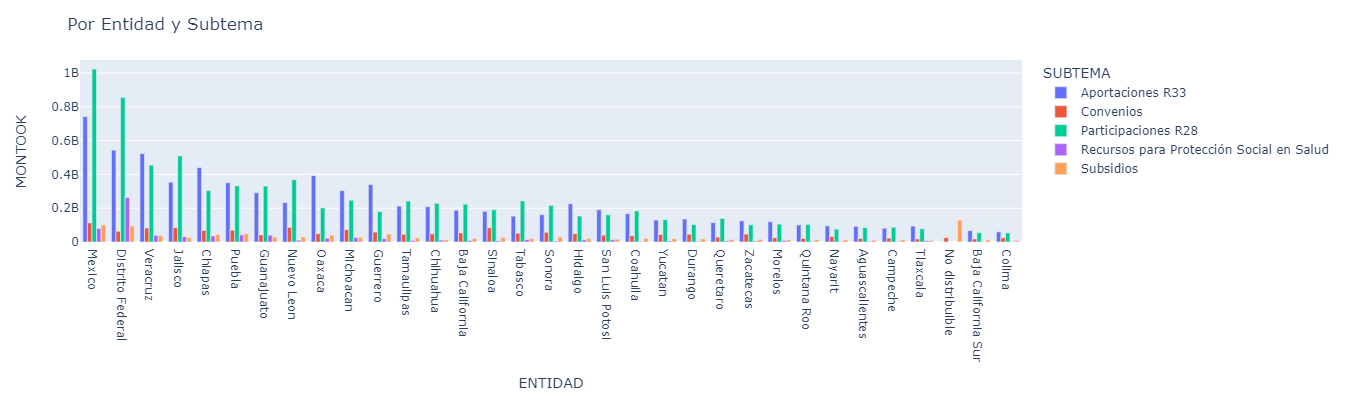

In [10]:
dt_entidad_subtema = df2.groupby(['ENTIDAD', 'SUBTEMA']).agg({'MONTOOK': 'sum'}).reset_index()
fig1 = px.bar(dt_entidad_subtema, x="ENTIDAD", y="MONTOOK",
             color='SUBTEMA', barmode='group',
             height=400)
fig1.update_layout(title_text='Por Entidad y Subtema', xaxis={'categoryorder':'total descending'})
fig1.show()

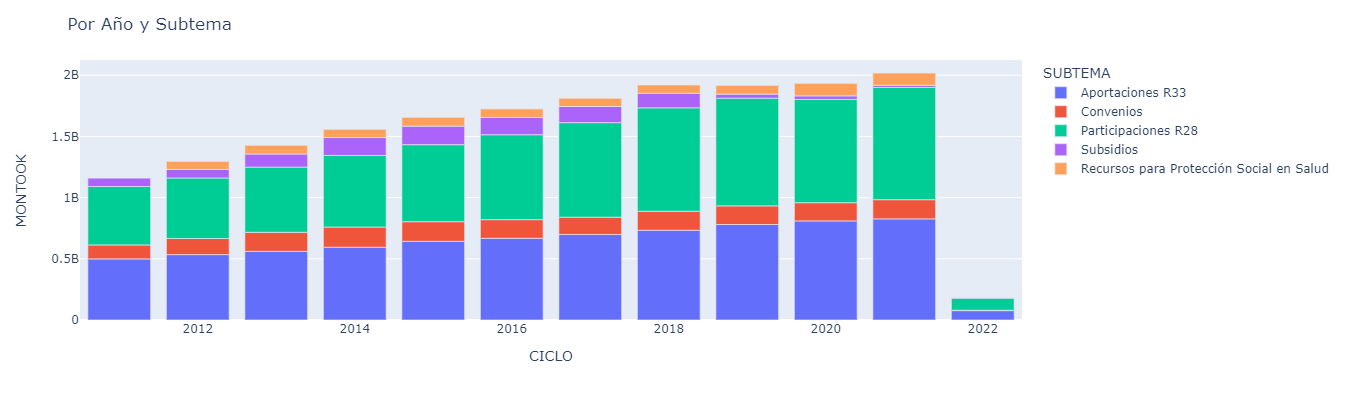

In [11]:
dt_ciclo_subtema = df2.groupby(['CICLO', 'SUBTEMA']).agg({'MONTOOK': 'sum'}).reset_index()
fig2 = px.bar(dt_ciclo_subtema, x="CICLO", y="MONTOOK",
             color='SUBTEMA', #barmode='group',
             height=400)
fig2.update_layout(title_text='Por Año y Subtema')
fig2.show()

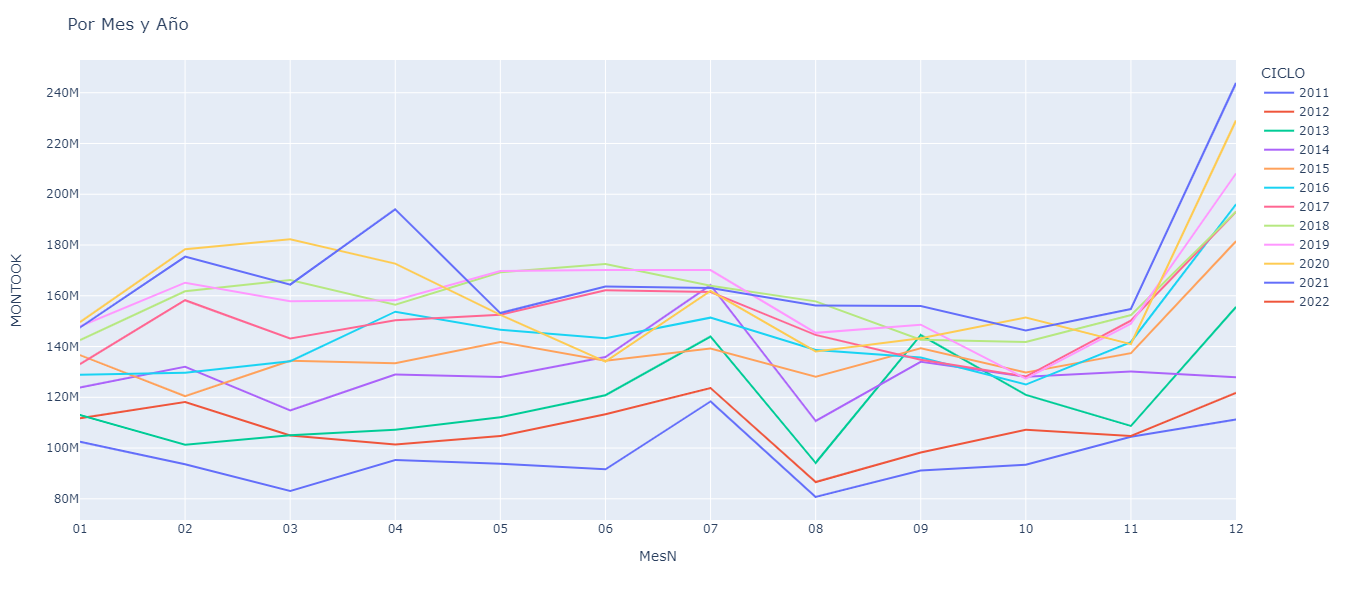

In [12]:
dt_fecha = df2.groupby(['CICLO', 'MesN']).agg({'MONTOOK': 'sum'}).reset_index()
fig3 = px.line(dt_fecha, 
             x="MesN", 
             y="MONTOOK",
             color='CICLO', 
            # color_discrete_map='blue',
             height=600)
fig3.update_layout(title_text='Por Mes y Año')
fig3.show()

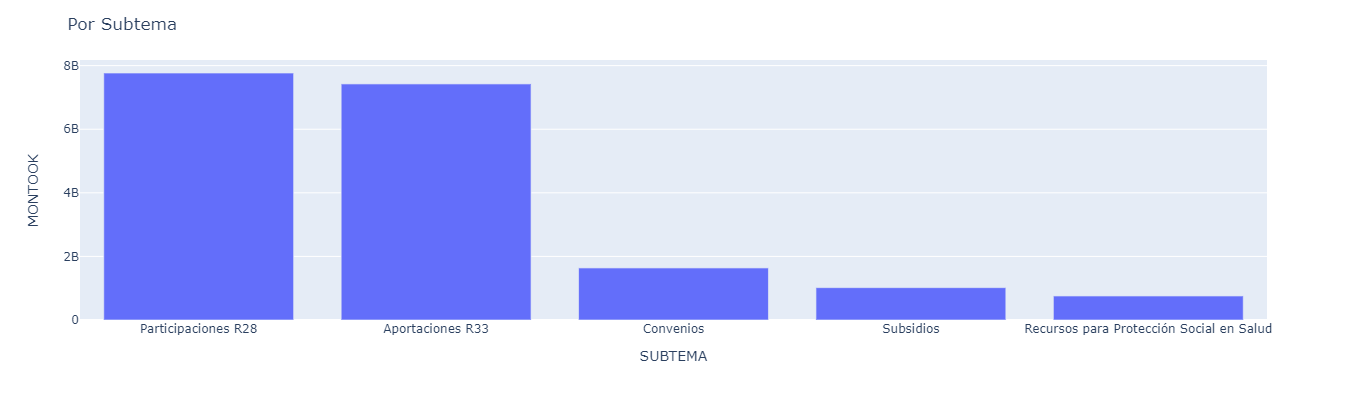

In [13]:
dt_subtema = df2.groupby(['SUBTEMA']).agg({'MONTOOK': 'sum'}).reset_index()
fig4 = px.bar(dt_subtema, x="SUBTEMA", y="MONTOOK",
             #color='SUBTEMA', 
             #barmode='group',
             height=400)
fig4.update_layout(title_text='Por Subtema', xaxis={'categoryorder':'total descending'})
fig4.show()

C:\Users\Homar\anaconda3\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Homar\anaconda3\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



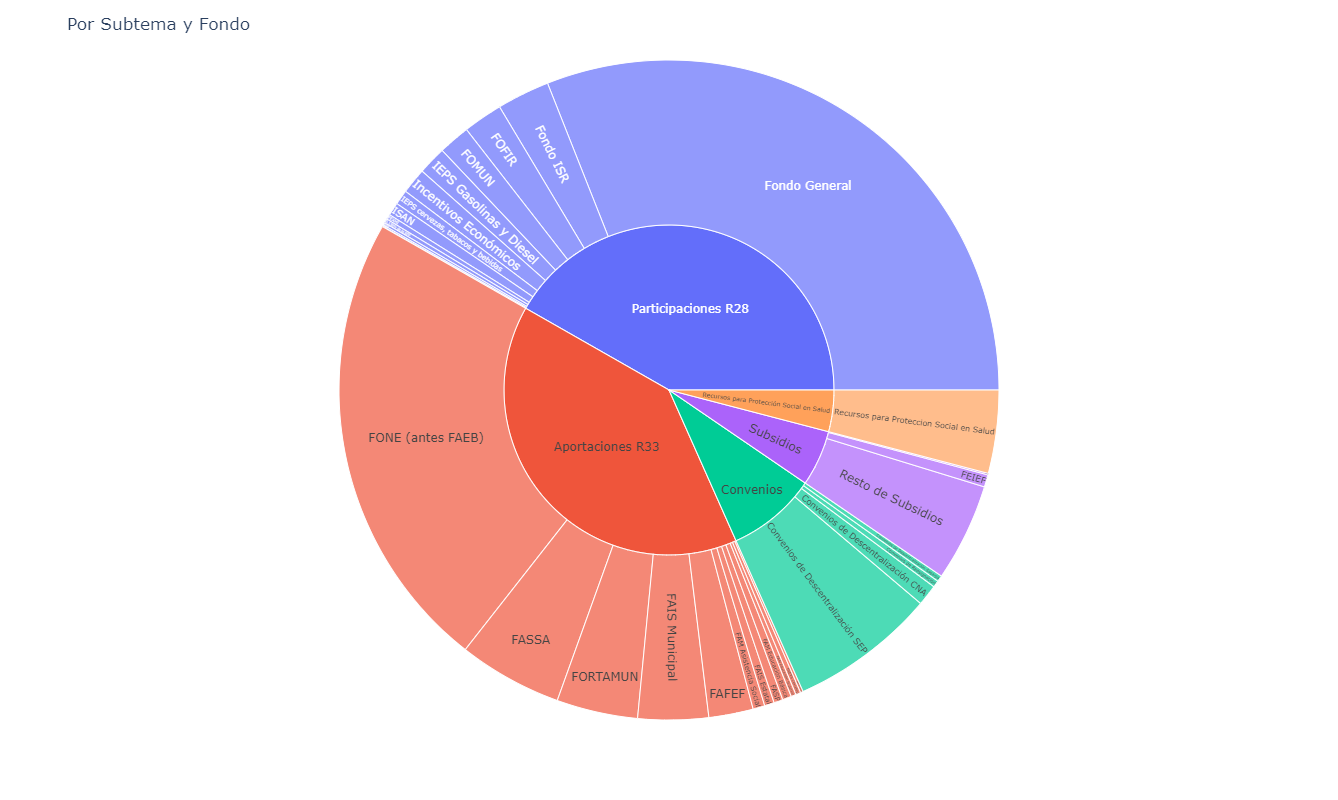

In [14]:
dt_subtema_concepto = df2.groupby(['SUBTEMA', 'CONCEPTO']).agg({'MONTOOK': 'sum'}).reset_index()
fig5 = px.sunburst(dt_subtema_concepto, path=['SUBTEMA', 'CONCEPTO'], values='MONTOOK', height=800)
fig5.update_layout(title_text='Por Subtema y Fondo')
fig5.show()

C:\Users\Homar\anaconda3\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Homar\anaconda3\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Homar\anaconda3\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



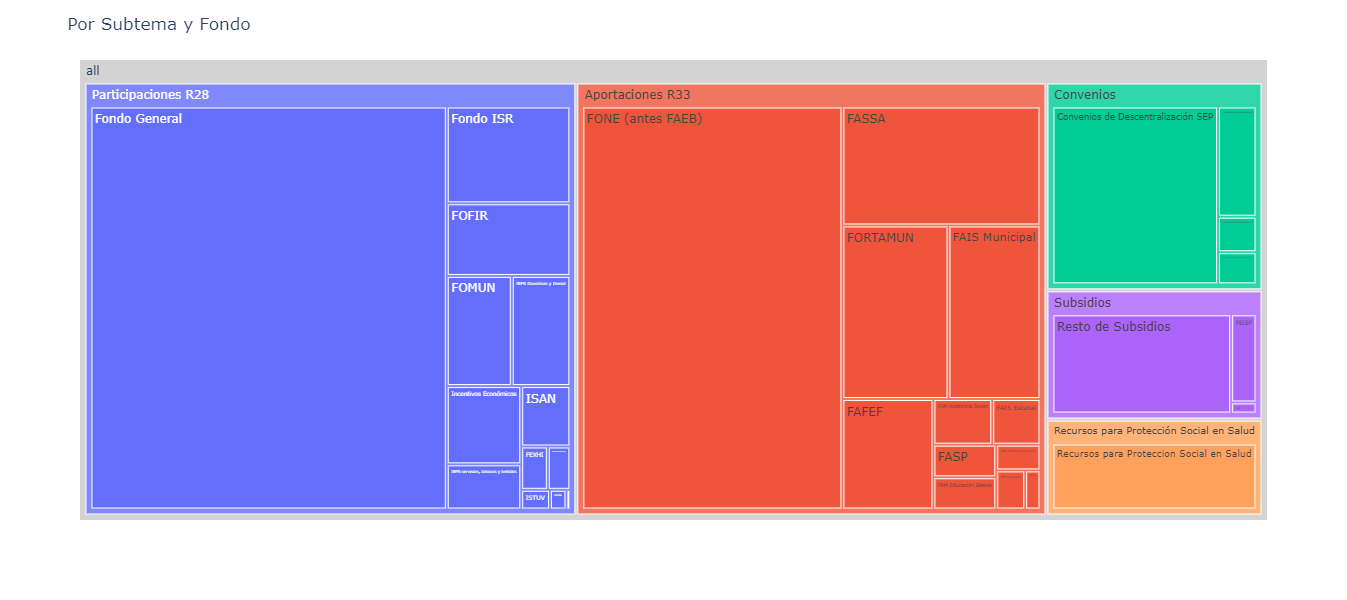

In [15]:
dt_subtema_concepto["all"] = "all"
fig6 = px.treemap(dt_subtema_concepto, path=['all', 'SUBTEMA', 'CONCEPTO'], values='MONTOOK', height=600)
fig6.update_traces(root_color="lightgrey")
fig6.update_layout(title_text='Por Subtema y Fondo')
fig6.show()

In [16]:
import json
mexico_path = 'C:/Users/Homar/Documents/Jupyter Notebooks/Mapeando/mexican_states.geojson'
with open(mexico_path) as f:
    geo_mexico = json.load(f)
print(geo_mexico["features"][0]["properties"])

{'objectid': 1069, 'fips_admin': 'MX22', 'gmi_admin': 'MEX-QDA', 'admin_name': 'Queretaro', 'fips_cntry': 'MX', 'gmi_cntry': 'MEX', 'cntry_name': 'Mexico', 'pop_admin': 1143544, 'type_eng': 'State', 'type_loc': 'Estado', 'sqkm': 12094.6, 'sqmi': 4669.73, 'color_map': '11', 'shape_leng': 5.66621056862, 'shape_area': 1.0467242079, 'cartodb_id': 13, 'created_at': '2014-08-19T17:34:57Z', 'updated_at': '2014-08-19T17:34:57Z'}


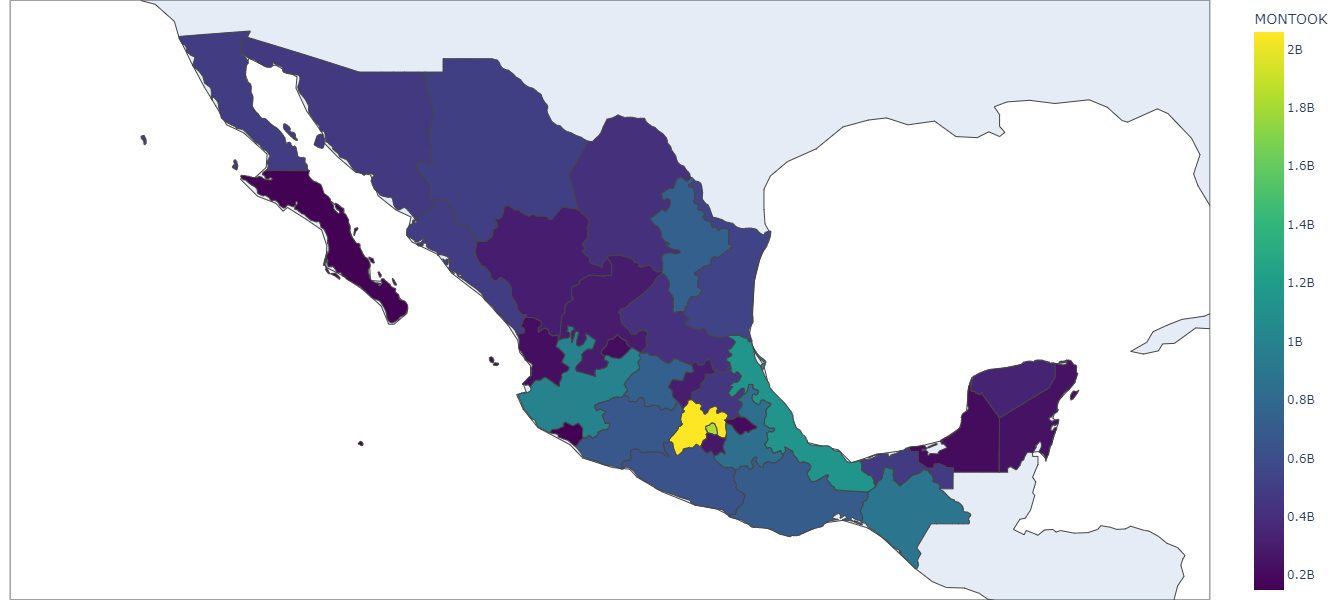

In [17]:
dt_entidad = df2.groupby(['ENTIDAD']).agg({'MONTOOK': 'sum'}).reset_index()
fig7 = px.choropleth(dt_entidad, 
                     geojson=geo_mexico, 
                     locations="ENTIDAD", 
                     featureidkey="properties.admin_name",
                     color='MONTOOK',
                     color_continuous_scale="Viridis",
                     fitbounds='locations', height=600
                     )
fig7.update_layout(title_text='Por Entidad', 
                   margin={"r":0,"t":0,"l":0,"b":0})
fig7.show()

In [18]:
df2.to_csv('transferencias_entidades_fed.csv')